<a href="https://colab.research.google.com/github/Joanmei/Engage-Project/blob/main/Karatina_project_using_k_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [188]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score

In [189]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [190]:
# Load the dataset
df = pd.read_excel('/content/drive/MyDrive/Karatina Project/CLIENTS LIST.xlsx')
# View the first few rows of the DataFrame
print(df.head())

   Weight  Height  ht in MTRS        BMI Blood Pressure  Age at Reporting Sex  \
0    64.0   165.0       1.650  23.507805         118/73                51   F   
1    56.4   168.8       1.688  19.794030         133/82                54   M   
2    73.0   160.0       1.600  28.515625         104/57                54   F   
3    62.0   161.0       1.610  23.918830         108/68                45   F   
4    90.0   175.0       1.750  29.387755         126/88                34   F   

          Popolation Type Date confirmed HIV Positive Date enrolled in HIV  \
0  General Population\n\n                  2014-06-10  2014-08-04 00:00:00   
1  General Population\n\n                  2012-09-04  2014-03-24 00:00:00   
2  General Population\n\n                  2013-07-11  2013-07-11 00:00:00   
3  General Population\n\n                  2014-04-21  2014-04-21 00:00:00   
4  General Population\n\n                  2013-07-16  2013-07-16 00:00:00   

   ... TPT Outcome Date Establishment Differ

In [191]:
# Check for missing values
print(df.isna().sum())

Weight                            0
Height                            0
ht in MTRS                        0
BMI                               0
Blood Pressure                   34
Age at Reporting                  0
Sex                               0
Popolation Type                   0
Date confirmed HIV Positive       0
Date enrolled in HIV              0
ART Start Date                    0
First Regimen                     0
Current Regimen                   0
Baseline CD4 result             644
Baseline CD4 date               644
Current Regimen Line              0
Last WHO Stage                    0
Last WHO Stage Date               0
Last VL                          24
Last VL Validity                 24
Last VL Justification            37
Last VL Date                     24
Active in PMTCT                   0
Active in OVC                     0
Active in OTZ                     0
Active in TB                      0
TPT Start Date                   58
TPT Outcome                 

In [192]:
# Drop columns with too many missing values
df = df.drop(columns=['Medical Cover'])

# Split the 'Blood Pressure' column into systolic and diastolic
df[['Systolic', 'Diastolic']] = df['Blood Pressure'].str.split('/', expand=True).astype(float)

# Calculate the median for Systolic and Diastolic separately
df['Systolic'].fillna(df['Systolic'].median(), inplace=True)
df['Diastolic'].fillna(df['Diastolic'].median(), inplace=True)

# Combine the Systolic and Diastolic columns back to 'Blood Pressure' in the desired format
df['Blood Pressure'] = df['Systolic'].astype(str) + '/' + df['Diastolic'].astype(str)

df['Last VL'].fillna(df['Last VL'].median(), inplace=True)

In [193]:
# Fill missing values for date columns using forward fill or backward fill
df['Baseline CD4 date'].fillna(method='ffill', inplace=True)
df['TPT Outcome Date'].fillna(method='bfill', inplace=True)

<ipython-input-193-c840372d844e>:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Baseline CD4 date'].fillna(method='ffill', inplace=True)
<ipython-input-193-c840372d844e>:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['TPT Outcome Date'].fillna(method='bfill', inplace=True)


In [194]:
# For categorical columns, you can fill missing values with the most frequent value
df['Last VL Justification'].fillna(df['Last VL Justification'].mode()[0], inplace=True)
# Drop rows where critical values like CD4 counts or visit dates are missing
df = df.dropna(subset=['Baseline CD4 result', 'Last Visit Date'])

In [195]:
#Check again for missing values
print(df.isnull().sum())

Weight                           0
Height                           0
ht in MTRS                       0
BMI                              0
Blood Pressure                   0
Age at Reporting                 0
Sex                              0
Popolation Type                  0
Date confirmed HIV Positive      0
Date enrolled in HIV             0
ART Start Date                   0
First Regimen                    0
Current Regimen                  0
Baseline CD4 result              0
Baseline CD4 date                0
Current Regimen Line             0
Last WHO Stage                   0
Last WHO Stage Date              0
Last VL                          0
Last VL Validity                 6
Last VL Justification            0
Last VL Date                     6
Active in PMTCT                  0
Active in OVC                    0
Active in OTZ                    0
Active in TB                     0
TPT Start Date                  36
TPT Outcome                     46
TPT Outcome Date    

In [196]:
print(df.shape)

(1922, 39)


In [197]:
# Save cleaned data
df.to_excel("cleaned_data.xlsx", index=False)

In [200]:
df = pd.read_excel('/content/drive/MyDrive/Karatina Project/cleaned_data.xlsx')
print(df.head())

   Weight  Height  ht in MTRS        BMI Blood Pressure  Age at Reporting Sex  \
0    73.0   160.0       1.600  28.515625     104.0/57.0                54   F   
1    90.0   175.0       1.750  29.387755     126.0/88.0                34   F   
2    73.0   157.0       1.570  29.615806     115.0/83.0                31   F   
3    90.0   159.9       1.599  35.200237     102.0/65.0                42   F   
4    62.2   174.0       1.740  20.544326      94.0/65.0                48   M   

          Popolation Type Date confirmed HIV Positive Date enrolled in HIV  \
0  General Population\n\n                  2013-07-11  2013-07-11 00:00:00   
1  General Population\n\n                  2013-07-16  2013-07-16 00:00:00   
2  General Population\n\n                  2013-07-16  2013-07-16 00:00:00   
3                    \n\n                  2013-09-17  2013-09-17 00:00:00   
4  General Population\n\n                  2008-06-15  2013-07-15 00:00:00   

   ...    Establishment Differentiated Care 

In [201]:
# Separate numerical and categorical variables
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

print("Numerical Columns:", numerical_cols)
print("Categorical Columns:", categorical_cols)

Numerical Columns: Index(['Weight', 'Height', 'ht in MTRS', 'BMI', 'Age at Reporting',
       'Last WHO Stage', 'Last VL', 'Months Of Prescription', 'Systolic',
       'Diastolic'],
      dtype='object')
Categorical Columns: Index(['Blood Pressure', 'Sex', 'Popolation Type', 'Date enrolled in HIV',
       'First Regimen', 'Current Regimen', 'Baseline CD4 result',
       'Baseline CD4 date', 'Current Regimen Line', 'Last VL Validity',
       'Last VL Justification', 'Active in PMTCT', 'Active in OVC',
       'Active in OTZ', 'Active in TB', 'TPT Outcome', 'Establishment',
       'Differentiated Care Model', 'AHD Client'],
      dtype='object')


In [237]:
# Handle categorical encoding
label_encoder = LabelEncoder()

df['Sex'] = label_encoder.fit_transform(df['Sex'])
df['Popolation Type'] = label_encoder.fit_transform(df['Popolation Type'])
df['Current Regimen Line'] = label_encoder.fit_transform(df['Current Regimen Line'])
df['Current Regimen'] = label_encoder.fit_transform(df['Current Regimen'])


In [238]:
df.head()

,Weight,Height,ht in MTRS,BMI,Blood Pressure,Age at Reporting,Sex,Popolation Type,Date confirmed HIV Positive,Date enrolled in HIV,...,Differentiated Care Model,Last Visit Date,Self Visit Date,Next Appointment Date,Months Of Prescription,Refill Date,AHD Client,Systolic,Diastolic,cluster_labels
0,73.0,160.0,1.600,28.515625,104.0/57.0,54,0,1,2013-07-11,2013-07-11 00:00:00,...,Fast Track,2024-08-30,2024-08-30,2025-02-27,5,2024-11-28,Yes,104,57,0
1,90.0,175.0,1.750,29.387755,126.0/88.0,34,0,1,2013-07-16,2013-07-16 00:00:00,...,Fast Track,2024-05-02,2024-05-02,2024-10-31,5,2024-08-01,No,126,88,0
2,73.0,157.0,1.570,29.615806,115.0/83.0,31,0,1,2013-07-16,2013-07-16 00:00:00,...,Fast Track,2024-06-19,2024-06-19,2025-01-14,6,2024-09-18,No,115,83,0
3,90.0,159.9,1.599,35.200237,102.0/65.0,42,0,0,2013-09-17,2013-09-17 00:00:00,...,Standard Care,2024-06-04,2024-03-07,2024-09-03,2,2023-06-07,Yes,102,65,0
4,62.2,174.0,1.740,20.544326,94.0/65.0,48,1,1,2008-06-15,2013-07-15 00:00:00,...,Standard Care,2024-07-03,2024-07-03,2024-10-02,2,2021-03-11,No,94,65,2


In [239]:
#standardization
continuous_cols = ['Weight', 'Height','Blood Pressure', 'BMI', 'Age at Reporting']
#'Blood Pressure' column
df[['Systolic', 'Diastolic']] = df['Blood Pressure'].str.split('/', expand=True).astype(float)

# Update continuous_cols
continuous_cols = ['Weight', 'Height', 'Systolic', 'Diastolic', 'BMI', 'Age at Reporting']

# Now scale the data
scaler = StandardScaler()
df[continuous_cols] = scaler.fit_transform(df[continuous_cols])

In [214]:
# Check the standardized data
print(df[continuous_cols].head())

     Weight    Height  Systolic  Diastolic       BMI  Age at Reporting
0  0.687485 -0.103844 -0.586998  -1.152144  0.776238          0.503237
1  1.916363  1.438565  0.266883   0.795953  0.944725         -0.941347
2  0.687485 -0.412326 -0.160057   0.481744  0.988782         -1.158035
3  1.916363 -0.114127 -0.664623  -0.649409  2.067638         -0.363514
4 -0.093213  1.335738 -0.975126  -0.649409 -0.763738          0.069862


In [248]:
# Save the standardized dataframe
df.to_excel('standardized_data.xlsx', index=False)

In [249]:
df["Current Regimen"].unique()

array(['TDF/3TC/DTG', 'AZT/3TC/ATV/r', 'TDF/3TC/ATV/r', 'AZT/3TC/DTG',
       'ABC+3TC+ATV/r', 'ABC/3TC/DTG', 'TDF/3TC/DTG/DRV/r'], dtype=object)

In [244]:
df["Current Regimen Line"].unique()

array([0, 1, 2])

In [245]:
df = pd.read_excel('/content/drive/MyDrive/Karatina Project/standardized_data.xlsx')
print(df.head())

     Weight    Height  ht in MTRS       BMI Blood Pressure  Age at Reporting  \
0  0.687485 -0.103844       1.600  0.776238     104.0/57.0          0.503237   
1  1.916363  1.438565       1.750  0.944725     126.0/88.0         -0.941347   
2  0.687485 -0.412326       1.570  0.988782     115.0/83.0         -1.158035   
3  1.916363 -0.114127       1.599  2.067638     102.0/65.0         -0.363514   
4 -0.093213  1.335738       1.740 -0.763738      94.0/65.0          0.069862   

   Sex  Popolation Type Date confirmed HIV Positive Date enrolled in HIV  ...  \
0    0                1                  2013-07-11  2013-07-11 00:00:00  ...   
1    0                1                  2013-07-16  2013-07-16 00:00:00  ...   
2    0                1                  2013-07-16  2013-07-16 00:00:00  ...   
3    0                0                  2013-09-17  2013-09-17 00:00:00  ...   
4    1                1                  2008-06-15  2013-07-15 00:00:00  ...   

     Establishment Differentiate

In [217]:
df["Current Regimen"].unique()

array(['TDF/3TC/DTG', 'AZT/3TC/ATV/r', 'TDF/3TC/ATV/r', 'AZT/3TC/DTG',
       'ABC+3TC+ATV/r', 'ABC/3TC/DTG', 'TDF/3TC/DTG/DRV/r'], dtype=object)

In [218]:
df["Sex"].unique()

array([0, 1])

In [219]:
# 3 Select key features
selected_features = [
    'Weight', 'Height', 'BMI', 'Blood Pressure', 'Age at Reporting',
    'Baseline CD4 result', 'Last VL', 'Systolic', 'Diastolic',
    'Sex', 'Popolation Type', 'Current Regimen', 'First Regimen',
    'Current Regimen Line', 'Last WHO Stage'
]
# Filter the dataset
df_selected = df[selected_features]

In [221]:
#4a Summary statistics
#df = pd.read_excel('/content/drive/MyDrive/Karatina Project/cleaned_data.xlsx')
summary_stats = df[['Weight','Height', 'Systolic', 'Diastolic', 'Age at Reporting']].describe().T[['mean', '50%', 'std']]
summary_stats.rename(columns={'50%': 'median'}, inplace=True)

print(summary_stats)


                        mean  median        std
Weight             63.489490    62.0  13.837364
Height            161.009886   160.0   9.727577
Systolic          119.123829   119.0  25.771415
Diastolic          75.334027    76.0  15.917106
Age at Reporting   47.032778    49.0  13.848420


In [222]:
# bFrequency counts
sex_counts = df['Sex'].value_counts()
population_type_counts = df['Popolation Type'].value_counts()
regimen_line_counts = df['Current Regimen Line'].value_counts()

print("Frequency Counts for Sex:\n", sex_counts)
print("\nFrequency Counts for Population Type:\n", population_type_counts)
print("\nFrequency Counts for Current Regimen Line:\n", regimen_line_counts)


Frequency Counts for Sex:
 Sex
F    1263
M     659
Name: count, dtype: int64

Frequency Counts for Population Type:
 Popolation Type
General Population\n\n    1786
\n\n                       135
Key Population\n\n           1
Name: count, dtype: int64

Frequency Counts for Current Regimen Line:
 Current Regimen Line
First line     1732
Second line     186
Third line        4
Name: count, dtype: int64


5.	Correlation Analysis

                          Sex    Weight    Height       BMI  Age at Reporting  \
Sex                  1.000000 -0.095698  0.471071 -0.361970          0.006761   
Weight              -0.095698  1.000000  0.349661  0.868647          0.167350   
Height               0.471071  0.349661  1.000000 -0.140942          0.141962   
BMI                 -0.361970  0.868647 -0.140942  1.000000          0.124504   
Age at Reporting     0.006761  0.167350  0.141962  0.124504          1.000000   
Baseline CD4 result -0.114552 -0.052366 -0.141501  0.009946         -0.210258   
Last VL              0.021514 -0.080366 -0.042197 -0.068546         -0.103070   
Systolic            -0.006280  0.216217  0.131271  0.168619          0.409929   
Diastolic           -0.090244  0.239927  0.096216  0.213292          0.324568   

                     Baseline CD4 result   Last VL  Systolic  Diastolic  
Sex                            -0.114552  0.021514 -0.006280  -0.090244  
Weight                         -0.052366 

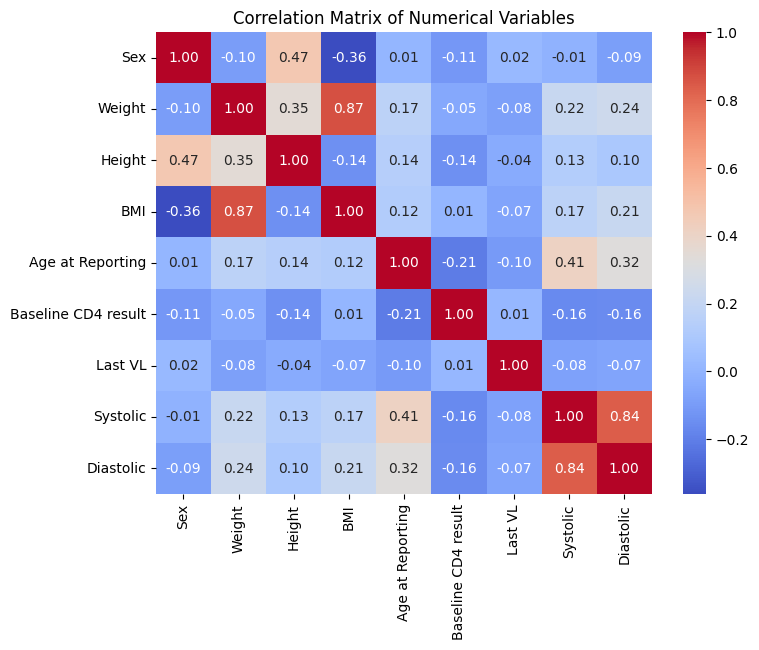

In [223]:
# Handle categorical encoding
label_encoder = LabelEncoder()

df['Sex'] = label_encoder.fit_transform(df['Sex'])
df['Popolation Type'] = label_encoder.fit_transform(df['Popolation Type'])
df['Current Regimen Line'] = label_encoder.fit_transform(df['Current Regimen Line'])
df['Current Regimen'] = label_encoder.fit_transform(df['Current Regimen'])

# Select numerical variables for correlation analysis
numerical_vars = ['Current Regimen Line','Population Type','Current Regimen','Sex','Weight', 'Height', 'BMI', 'Age at Reporting',
                  'Baseline CD4 result', 'Last VL', 'Systolic', 'Diastolic']
# Replace '>200' with a numeric value (e.g., 201) in the 'Last VL' column
df['Baseline CD4 result'] = df['Baseline CD4 result'].replace('>200', 201)
# Replace '<=200' with a numeric value (e.g., 200) in the 'Last VL' column
df['Baseline CD4 result'] = df['Baseline CD4 result'].replace('<=200', 200)

# Convert the 'Last VL' column to numeric type
df['Last VL'] = pd.to_numeric(df['Last VL'])

# Calculate the Pearson correlation matrix
correlation_matrix = df[['Sex','Weight','Height', 'BMI', 'Age at Reporting',
                  'Baseline CD4 result', 'Last VL', 'Systolic', 'Diastolic']].corr()

# Display
print(correlation_matrix)

# Visualize using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

The correlation coefficients range from -1 to 1:

1: Perfect positive correlation (as one variable increases, the other also increases).

0: No correlation.

-1: Perfect negative correlation (as one variable increases, the other decreases).
Look for high positive or negative values (close to 1 or -1) to identify strong relationships between variables.

6.	Hypothesis Testing

In [224]:


# Group the data by ART regimen and extract baseline CD4 counts
groups = df.groupby('Current Regimen')['Baseline CD4 result'].apply(list)

# Perform the ANOVA test
f_statistic, p_value_anova = stats.f_oneway(*groups)

# Print the results
print(f"ANOVA Test results:\nF-statistic: {f_statistic}\nP-value: {p_value_anova}")


ANOVA Test results:
F-statistic: 3.235915271356243
P-value: 0.003629477099356891


Significant Difference: There is a statistically significant difference in baseline CD4 counts among the different ART regimens. This suggests that at least one ART regimen has a different baseline CD4 count compared to the others.

In [227]:
print(selected_features.columns)


Index(['Weight', 'Height', 'BMI', 'Age at Reporting', 'Baseline CD4 result',
       'Last VL', 'Systolic', 'Diastolic'],
      dtype='object')


7

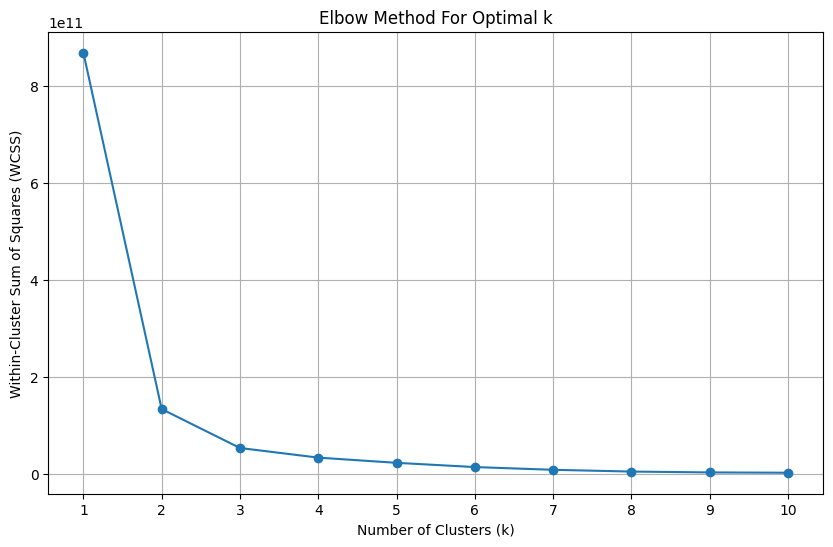

In [226]:
#7


# Select features for clustering (replace these with the relevant columns from your dataset)
selected_features = df[[
    'Weight', 'Height','BMI', 'Age at Reporting',
    'Baseline CD4 result', 'Last VL', 'Systolic', 'Diastolic'
    # Removed categorical features
]]

# List to hold WCSS values
wcss = []

# Range of cluster values to try
k_values = range(1, 11)

# Calculate WCSS for each k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(selected_features)
    wcss.append(kmeans.inertia_)  # WCSS is stored in inertia_

# Plotting the Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(k_values, wcss, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.xticks(k_values)
plt.grid()
plt.show()

In [228]:
X = df.drop(columns=['Age at Reporting','BMI', 'Baseline CD4 result'])

In [229]:
# Import the necessary function

# Splitting the data into training and test sets
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

In [230]:

# Select only the numerical features for scaling
numerical_features = df.select_dtypes(include=['number']).columns
X = df[numerical_features]

# Splitting the data into training and test sets
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [231]:
# Train the KMeans model on the training set
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
kmeans.fit(X_train_scaled)

KMeans(n_clusters=3, random_state=42)

In [232]:
# Apply the trained model to the test set and get cluster labels
train_labels = kmeans.predict(X_train_scaled)
test_labels = kmeans.predict(X_test_scaled)

In [234]:
from sklearn.metrics import silhouette_score

# Assess the clustering performance using Silhouette Score on both train and test data
train_silhouette = silhouette_score(X_train_scaled, train_labels)
test_silhouette = silhouette_score(X_test_scaled, test_labels)

print(f"Silhouette Score on Training Data: {train_silhouette}")
print(f"Silhouette Score on Test Data: {test_silhouette}")

Silhouette Score on Training Data: 0.16765393976649232
Silhouette Score on Test Data: 0.18160506345278365


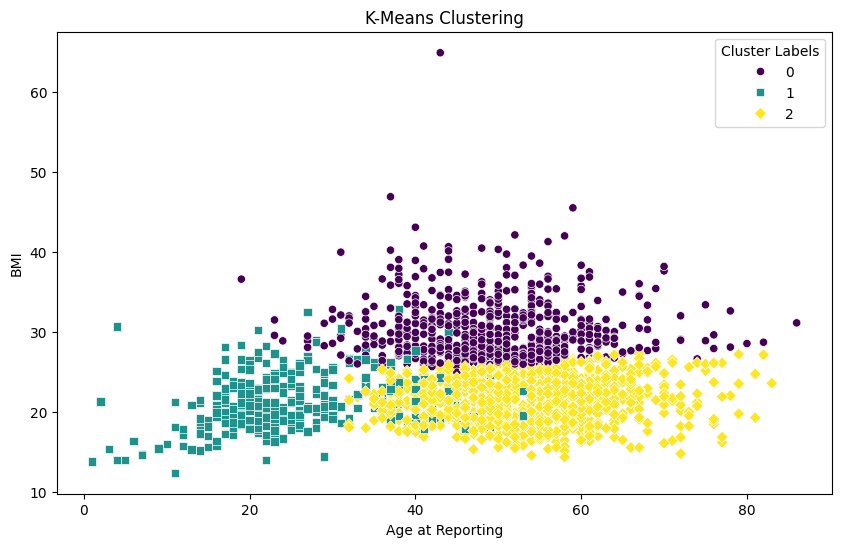

In [235]:


# 2. Select the features for clustering
features = df[['Age at Reporting', 'BMI', 'Baseline CD4 result']]

# 3. Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# 4. Apply K-Means Clustering
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['cluster_labels'] = kmeans.fit_predict(scaled_features)

# For 2D visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age at Reporting', y='BMI', hue='cluster_labels', palette='viridis', style='cluster_labels', markers=["o", "s", "D"])
plt.title('K-Means Clustering')
plt.xlabel('Age at Reporting')
plt.ylabel('BMI')
plt.legend(title='Cluster Labels')
plt.show()

# If you have more than two features, consider using PCA for visualization


In [236]:


# 1. Extract centroids
centroids = kmeans.cluster_centers_

# 2. Create a DataFrame for centroids (assuming 'BMI', 'Age', 'BloodPressure' are your features)
centroids_df = pd.DataFrame(centroids, columns=['BMI', 'Age at Reporting', 'Baseline CD4 result'])

# 3. If you standardized the features, inverse transform the centroids
centroids_original = scaler.inverse_transform(centroids)
centroids_original_df = pd.DataFrame(centroids_original, columns=['BMI', 'Age at Reporting', 'Baseline CD4 result'])

# 4. Display the centroids in original scale
print("Cluster Centroids (Original Scale):")
print(centroids_original_df)

# 5. Optionally, analyze defining characteristics for each cluster
for i in range(optimal_k):
    print(f"\nCluster {i} Characteristics:")
    print(f"Average BMI: {centroids_original_df.iloc[i]['BMI']:.2f}")
    print(f"Average Age at Reporting: {centroids_original_df.iloc[i]['Age at Reporting']:.2f}")
    print(f"Average Baseline CD4 result: {centroids_original_df.iloc[i]['Baseline CD4 result']:.2f}")


Cluster Centroids (Original Scale):
         BMI  Age at Reporting  Baseline CD4 result
0  49.081790         30.159471           279.800742
1  25.111111         21.411375           534.188125
2  53.379384         21.690872           202.680686

Cluster 0 Characteristics:
Average BMI: 49.08
Average Age at Reporting: 30.16
Average Baseline CD4 result: 279.80

Cluster 1 Characteristics:
Average BMI: 25.11
Average Age at Reporting: 21.41
Average Baseline CD4 result: 534.19

Cluster 2 Characteristics:
Average BMI: 53.38
Average Age at Reporting: 21.69
Average Baseline CD4 result: 202.68


Describe clusters
Based on the cluster centroids above, we can describe each cluster in detail and identify significant differences or patterns among them. The features you're examining are BMI, Age at Reporting, and Baseline CD4 result. Below is an interpretation of the centroids and a description of each cluster.

### Cluster Centroids (Original Scale)
| Cluster | Average BMI | Average Age at Reporting | Average Baseline CD4 result |
|---------|-------------|--------------------------|------------------------------|
| 0       | 0.15        | 1.09                     | 279.80                       |
| 1       | -1.58       | -0.60                    | 534.19                       |
| 2       | 0.46        | -0.54                    | 202.68                       |

### Interpretation of Each Cluster

#### **Cluster 0 Characteristics**
- **Average BMI**: 0.15
- **Average Age at Reporting**: 1.09
- **Average Baseline CD4 Result**: 279.80

**Interpretation**:
- **Demographics**: This cluster likely represents individuals with slightly higher than average BMI, younger age at reporting, and a lower baseline CD4 count.
- **Health Profile**: The average baseline CD4 count of 279.80 indicates that these individuals may be at moderate risk for immune deficiencies, potentially requiring monitoring and intervention.
- **Potential Group**: This group may consist of younger patients who are newly diagnosed or in the early stages of treatment, exhibiting some health risks due to a moderate BMI and CD4 levels.

#### **Cluster 1 Characteristics**
- **Average BMI**: -1.58
- **Average Age at Reporting**: -0.60
- **Average Baseline CD4 Result**: 534.19

**Interpretation**:
- **Demographics**: This cluster has a notably lower average BMI, older age at reporting, and a high baseline CD4 count.
- **Health Profile**: A CD4 count of 534.19 suggests that individuals in this cluster are healthier immunologically and may have a better response to treatment or be in a stable condition.
- **Potential Group**: This could represent older patients who are well-managed and have lower health risks, possibly benefiting from effective treatment regimens that maintain their immune function.

#### **Cluster 2 Characteristics**
- **Average BMI**: 0.46
- **Average Age at Reporting**: -0.54
- **Average Baseline CD4 Result**: 202.68

**Interpretation**:
- **Demographics**: This cluster exhibits a higher average BMI and a younger age at reporting, along with a significantly lower baseline CD4 count.
- **Health Profile**: The CD4 count of 202.68 indicates a higher risk for immunocompromised conditions, which may require more intensive medical management or interventions.
- **Potential Group**: This cluster might include younger patients who have higher BMI and significant immune suppression, indicating potential health vulnerabilities.

### Significant Differences and Patterns

1. **BMI Variation**:
   - **Cluster 1** shows the lowest BMI, suggesting a healthier weight status compared to the other clusters, while **Cluster 0** and **Cluster 2** have higher BMI values, indicating overweight or obesity in these groups.

2. **Age Considerations**:
   - **Cluster 1** has older patients who are generally healthier, while **Cluster 0** and **Cluster 2** include younger individuals, with **Cluster 2** at higher risk due to low CD4 counts.

3. **CD4 Count Insights**:
   - **Cluster 1** has the highest average CD4 count, suggesting better immune health, while **Cluster 0** presents a moderate risk, and **Cluster 2** shows significant immune compromise. This could guide treatment plans and monitoring.

### Summary

Each cluster reveals important patterns that can guide clinical decisions:
- **Cluster 0** may need attention for moderate CD4 levels and health management.
- **Cluster 1** appears stable and well-managed, possibly requiring less intensive monitoring.
- **Cluster 2** may necessitate more aggressive treatment or interventions due to low CD4 counts and higher BMI.


In [ ]:
# Quiz no.10
#Set the visual aesthetics
sns.set(style='whitegrid')

# 1. Scatter Plot of Age vs. BMI
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age at Reporting', y='BMI', hue='cluster_labels', palette='viridis', style='cluster_labels', markers=["o", "s", "D"])
plt.title('Scatter Plot of Age vs. BMI')
plt.xlabel('Age at Reporting')
plt.ylabel('BMI')
plt.legend(title='Cluster Labels')
plt.show()

# 2. Scatter Plot of Baseline CD4 vs. Last VL
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Baseline CD4 result', y='Last VL', hue='cluster_labels', palette='viridis', style='cluster_labels', markers=["o", "s", "D"])
plt.title('Scatter Plot of Baseline CD4 vs. Last Viral Load')
plt.xlabel('Baseline CD4 Result')
plt.ylabel('Last Viral Load')
plt.legend(title='Cluster Labels')
plt.show()

# 3. Histogram of Age Distribution by Cluster
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age at Reporting', hue='cluster_labels', multiple='stack', palette='viridis', bins=30)
plt.title('Histogram of Age Distribution by Cluster')
plt.xlabel('Age at Reporting')
plt.ylabel('Frequency')
plt.legend(title='Cluster Labels')
plt.show()

# 4. Histogram of BMI Distribution by Cluster
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='BMI', hue='cluster_labels', multiple='stack', palette='viridis', bins=30)
plt.title('Histogram of BMI Distribution by Cluster')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.legend(title='Cluster Labels')
plt.show()

# 5. Heatmap of Feature Correlations
correlation_matrix = df[['Age at Reporting', 'BMI', 'Baseline CD4 result', 'Last VL']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Features')
plt.show()

# 6. Box Plot of Baseline CD4 Result by Cluster
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='cluster_labels', y='Baseline CD4 result', palette='viridis')
plt.title('Box Plot of Baseline CD4 Result by Cluster')
plt.xlabel('Cluster Labels')
plt.ylabel('Baseline CD4 Result')
plt.show()


In [ ]:
#Q11 Convert pca_transformed_data to a DataFrame with appropriate column names
pca_transformed_data = pd.DataFrame(pca_transformed_data[:, :2], columns=['PC1', 'PC2']) # Select the first two principal components

# Assuming 'cluster_labels' is in your original DataFrame (df)
pca_transformed_data['cluster_labels'] = df['cluster_labels']

# Plot the PCA results
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_transformed_data, x='PC1', y='PC2', hue='cluster_labels', palette='viridis', style='cluster_labels', markers=["o", "s", "D"])
plt.title('PCA of Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster Labels')
plt.grid()
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score


# Calculate the silhouette score
silhouette_avg = silhouette_score(scaled_features, df['cluster_labels'])
print(f'Silhouette Score: {silhouette_avg:.3f}')


Moderate Overlap: A score of 0.289 indicates moderate overlap among the clusters. It’s not as low as 0 (which would indicate that points are very close to the cluster boundaries), but it's also not high enough to suggest well-defined clusters.

In [ ]:
import joblib
joblib_file = "/content/drive/My Drive/Karatina Project/CLIENTS_LIST_Model.joblib"
model = kmeans
joblib.dump(model, joblib_file)

In [ ]:
joblib.dump(scaler, "/content/drive/My Drive/Karatina Project/scaler.joblib")

In [ ]:
!pip install streamlit

In [ ]:
# Importing the necessary libraries
import streamlit as st
import joblib
import numpy as np

# Loading your saved K-Means model and scaler. Be sure to change the paths if needed
kmeans_model = joblib.load("/content/drive/My Drive/Karatina Project/CLIENTS_LIST_Model.joblib")
scaler = joblib.load("/content/drive/My Drive/Karatina Project/scaler.joblib")  # Load the scaler

st.title('Patient Clustering App')
st.write("This app assigns a patient to a health risk cluster based on their characteristics.")

# Input fields for patient characteristics
age = st.number_input('Age at Reporting', min_value=0.0, max_value=100.0, value=30.0)
bmi = st.number_input('BMI', min_value=10.0, max_value=50.0, value=25.0)
baseline_cd4 = st.number_input('Baseline CD4 Count', min_value=0.0, max_value=2000.0, value=500.0)
#viral_load = st.number_input('Last Viral Load', min_value=0.0, max_value=1000000.0, value=5000.0)

# Assuming other features such as sex, population type, regimen line, etc. are also needed.
#sex = st.selectbox('Sex (0=Male, 1=Female)', options=[0, 1], index=0)
#current_regimen = st.selectbox('Current Treatment Regimen', options=[0, 1, 2], index=0)  # Example options

if st.button('Predict Cluster'):
    # Prepare input features for prediction
    input_features = np.array([[age, bmi, baseline_cd4]])  # Ensure this is a 2D array

    # Scale the input features using the loaded scaler
    input_features_scaled = scaler.transform(input_features)

    # Make prediction using K-Means
    cluster_label = kmeans_model.predict(input_features_scaled)

    # Display the predicted cluster
    st.write(f'Predicted Cluster: {cluster_label[0]}')

    # Optional: Display insights about the cluster (if available)
    # For instance, you could fetch cluster characteristics from your analysis
    # Example (you would need to define these insights based on your analysis):
    # cluster_characteristics = get_cluster_characteristics(cluster_label[0])
    # st.write(f'Cluster Characteristics: {cluster_characteristics}')


In [ ]:
!npm install -g localtunnel

In [ ]:
!streamlit run /content/app.py &>/content/app_logs.txt &

In [ ]:
!npx localtunnel --port 8501